In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# read in the data
train = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')  
# check the data
train.head()

,county,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,...,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
0,Richland,0,0,day_10,363,0.000000,0.00000,0.000000,0.000011,0.000151,...,55.5,7.5,675,41877,23210,90.5,48.3,15.6,103700,0.868085
1,Lawrence,119,0,day_105,256,0.000000,0.00000,0.000000,0.000000,0.000000,...,53.5,6.5,655,42874,23510,92.2,49.3,18.6,101500,0.954027
2,Wayne,49,0,day_90,769,0.000076,0.00037,0.006502,0.000039,0.000000,...,64.0,4.0,762,50383,26658,87.2,55.1,13.0,140100,0.950541
3,Fayette,7,0,day_85,36,0.000000,0.00000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
4,Trumbull,0,0,day_7,554,0.000000,0.00000,0.000000,0.000046,0.000000,...,56.4,5.9,661,43073,25800,91.7,49.1,17.2,101600,0.885724


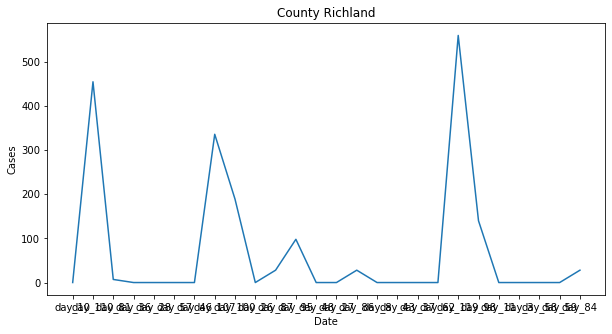

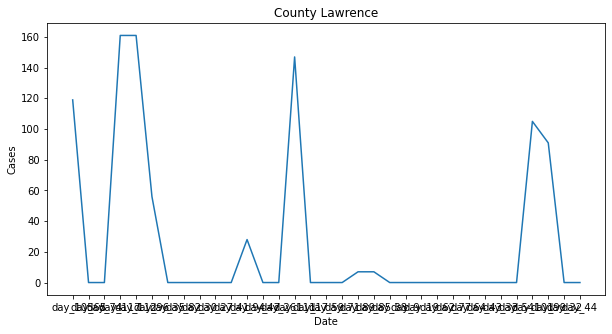

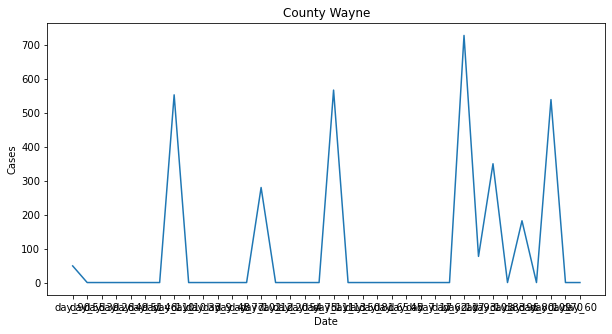

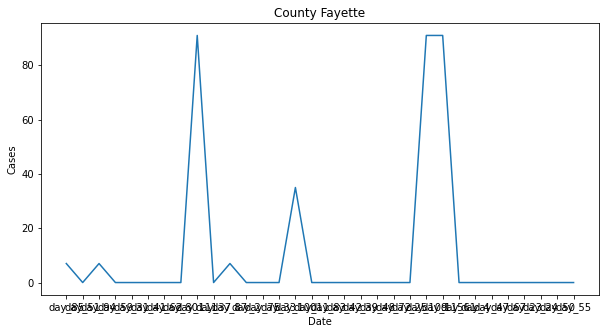

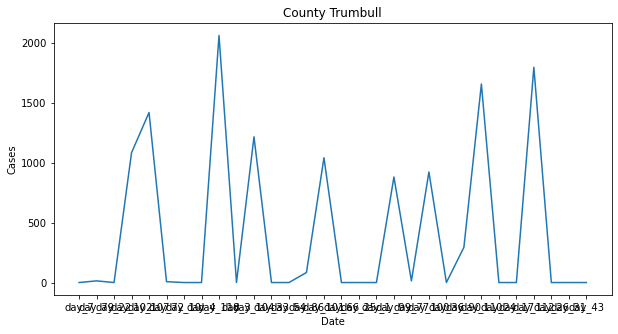

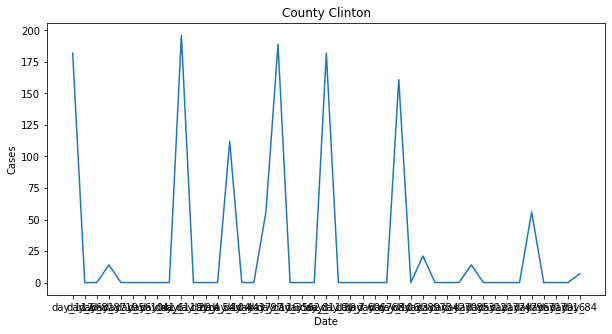

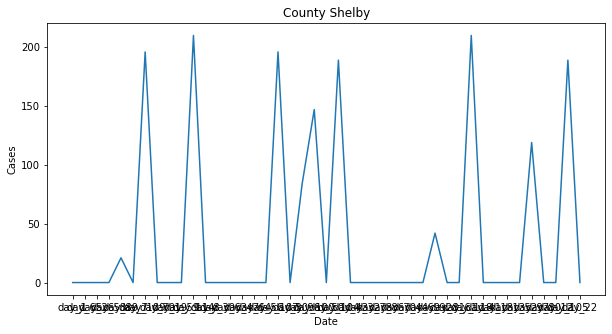

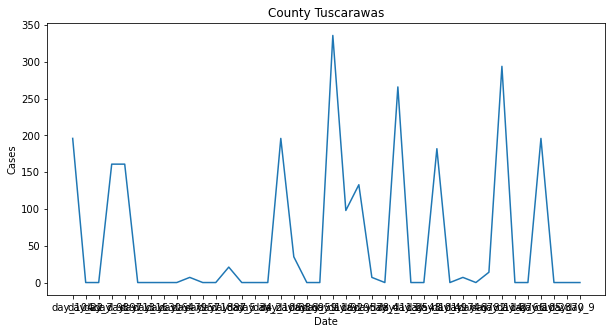

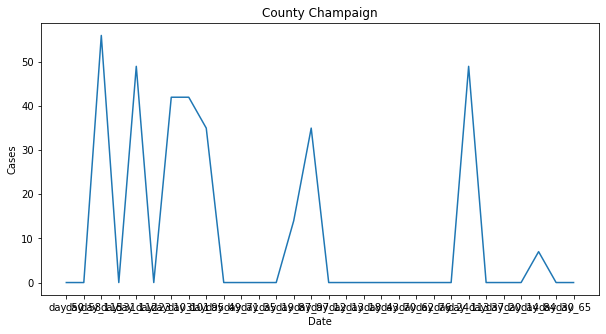

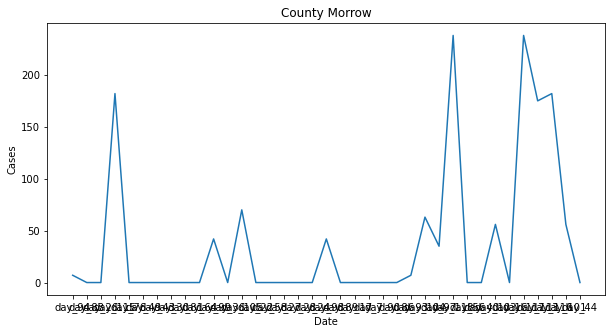

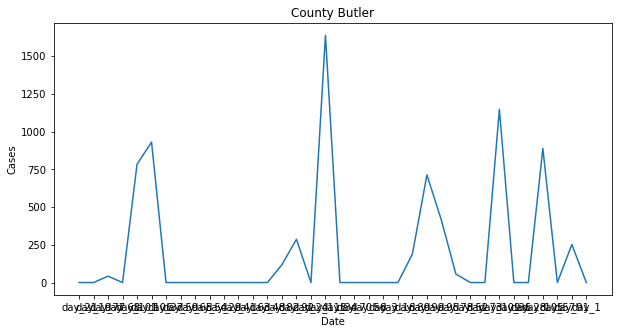

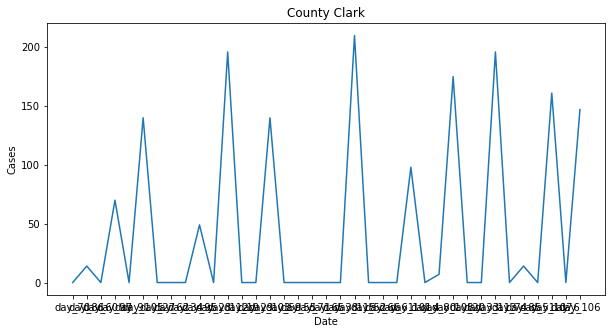

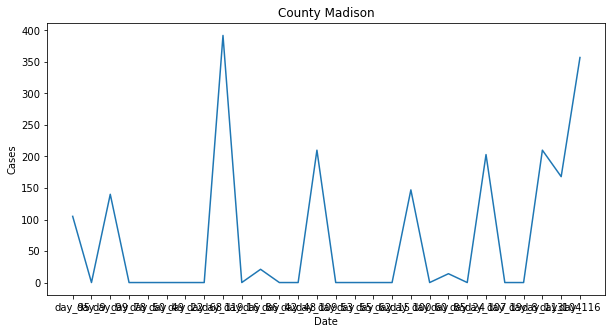

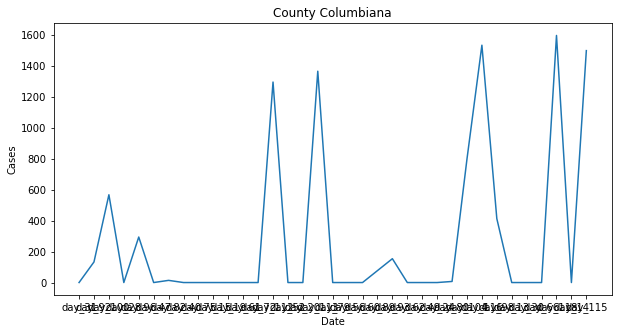

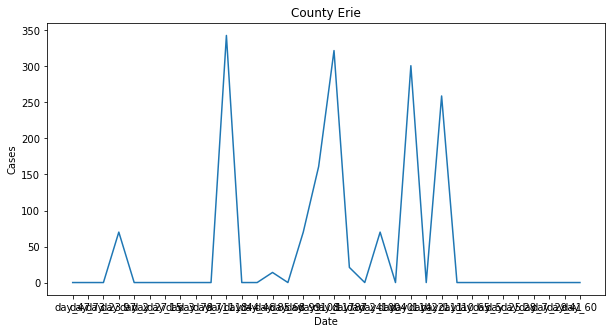

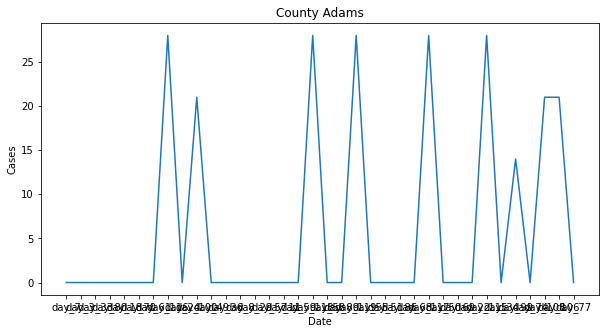

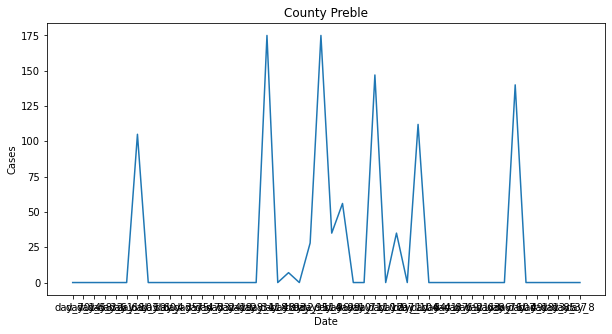

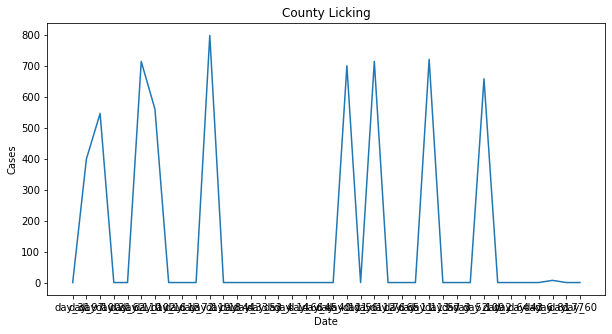

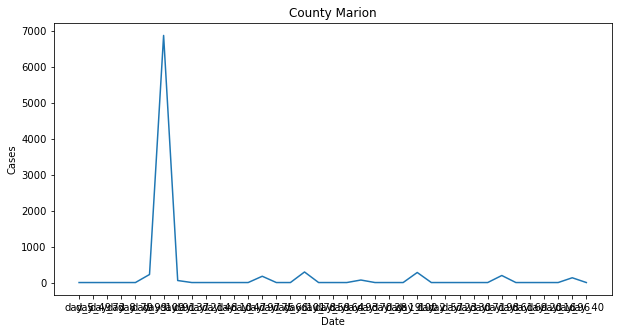

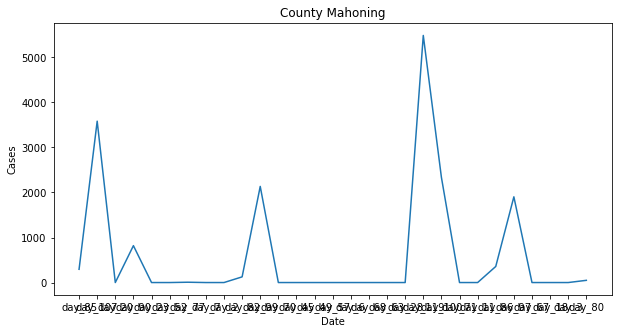

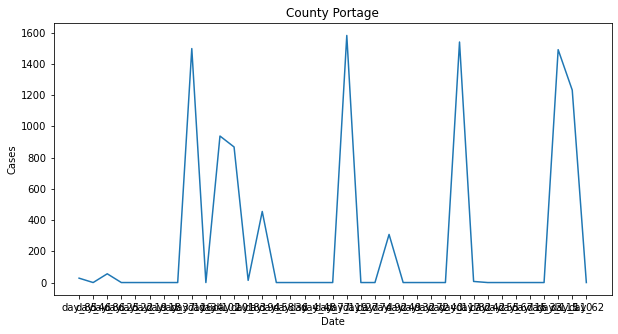

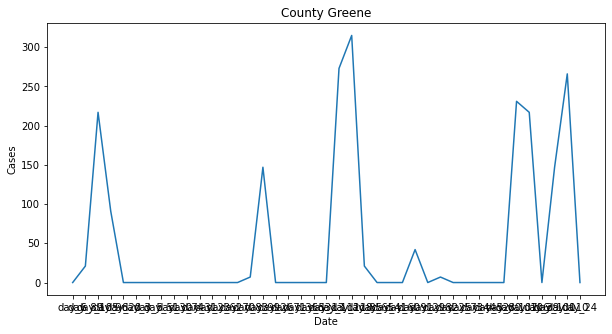

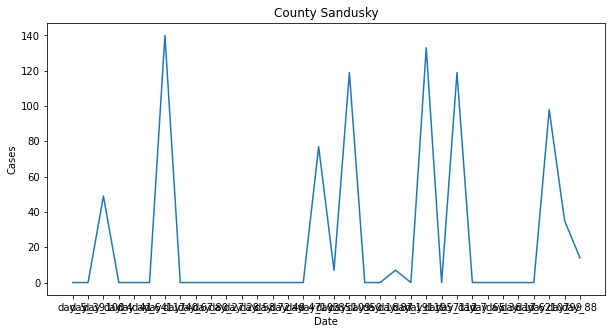

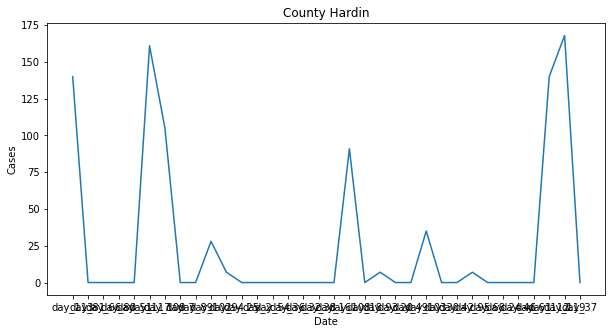

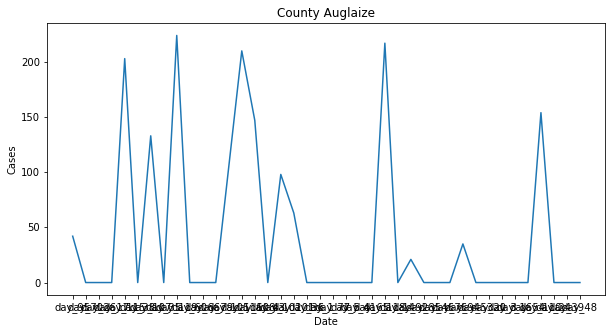

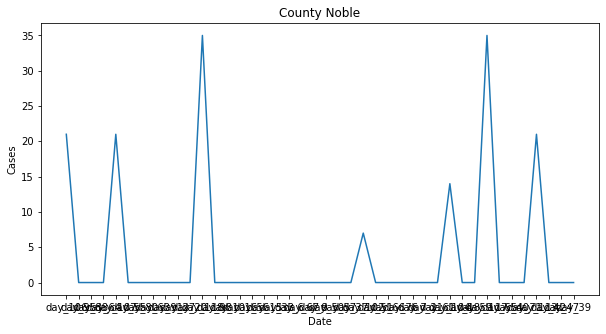

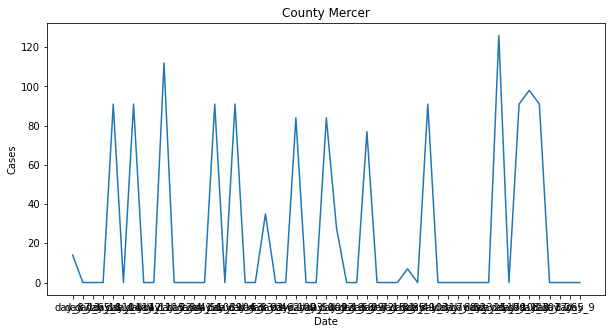

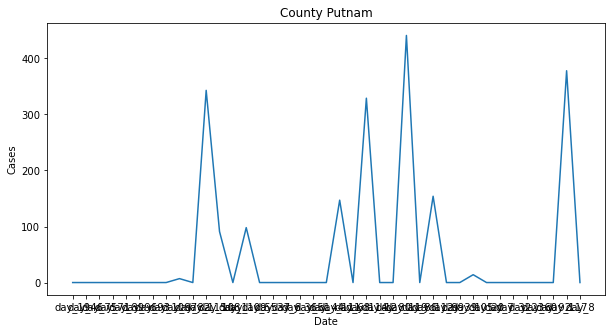

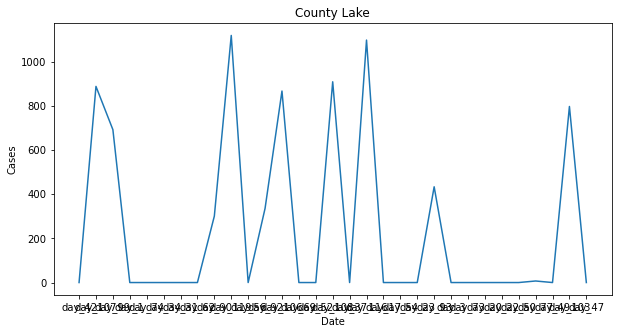

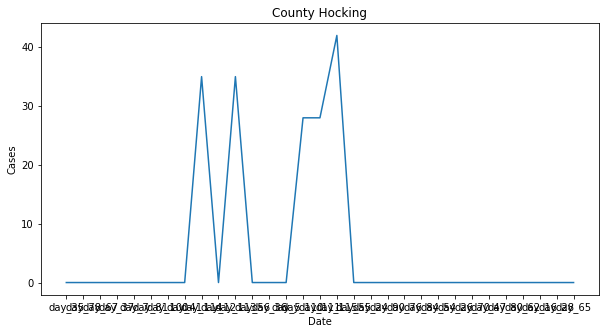

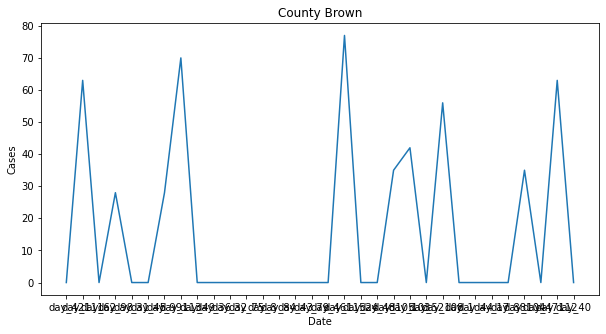

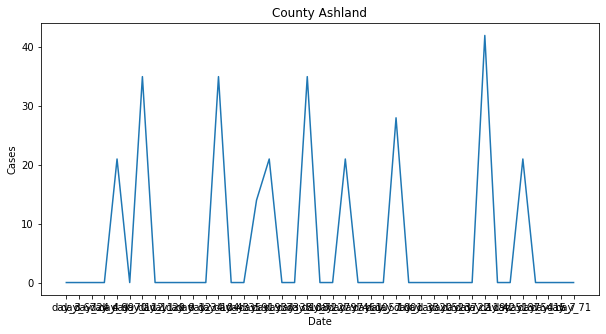

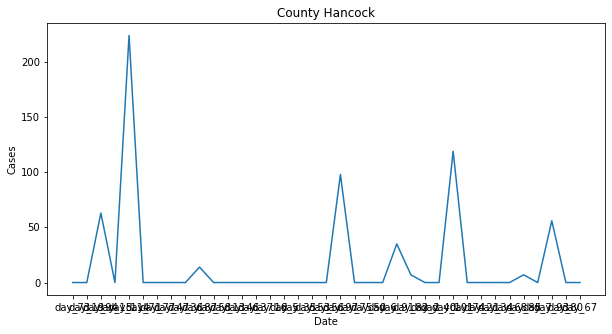

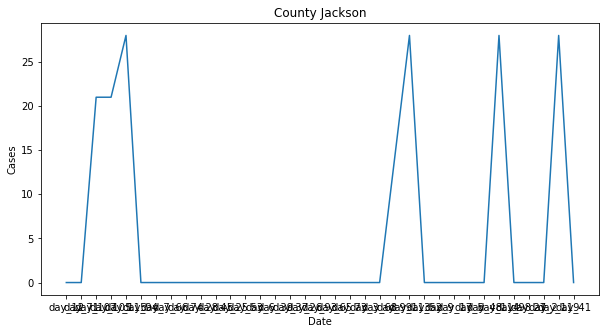

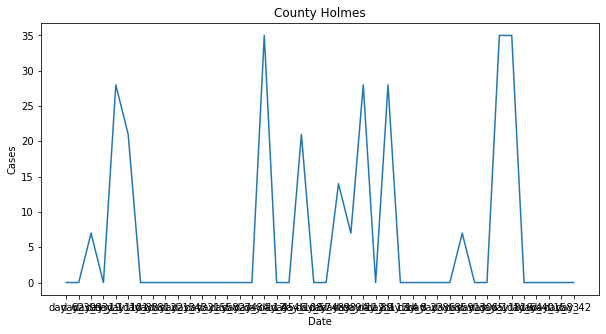

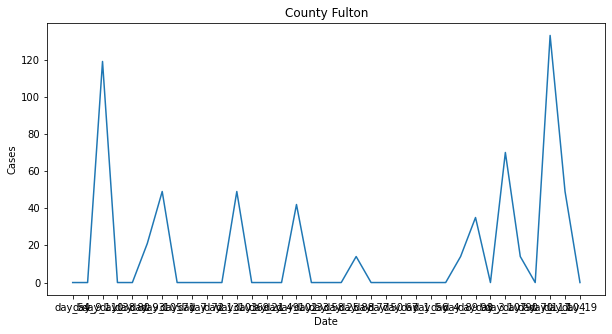

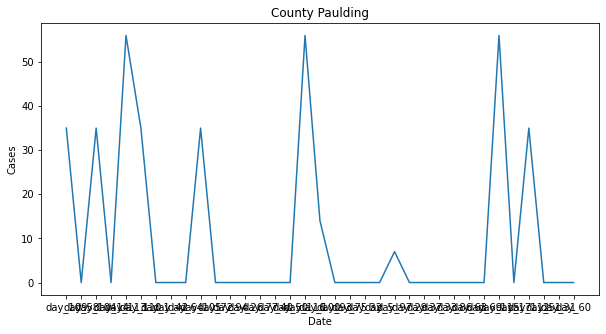

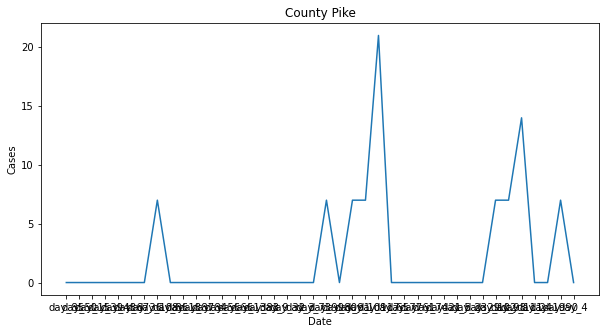

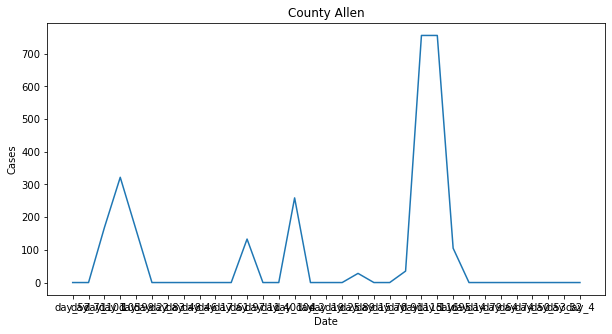

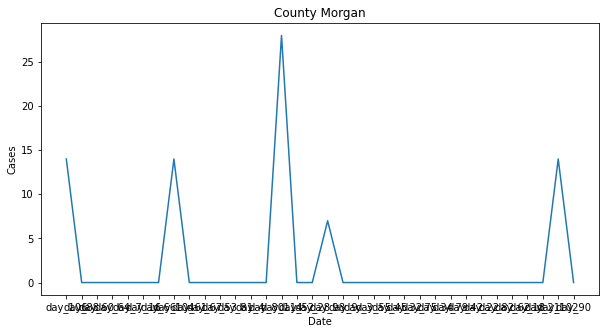

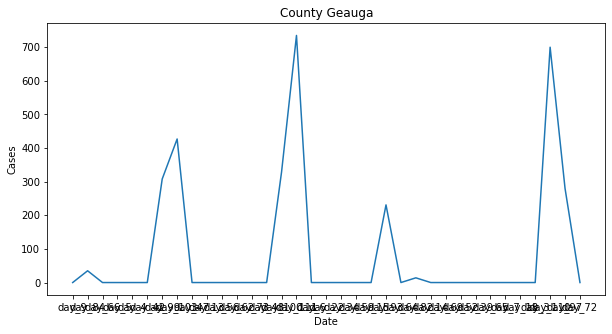

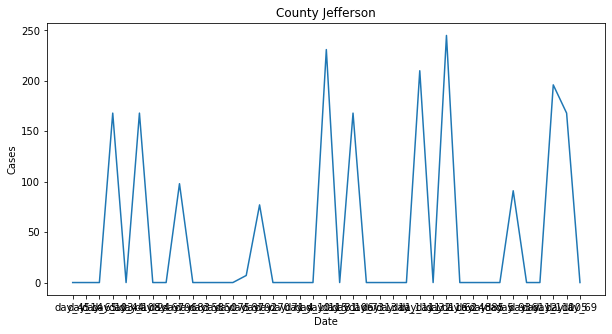

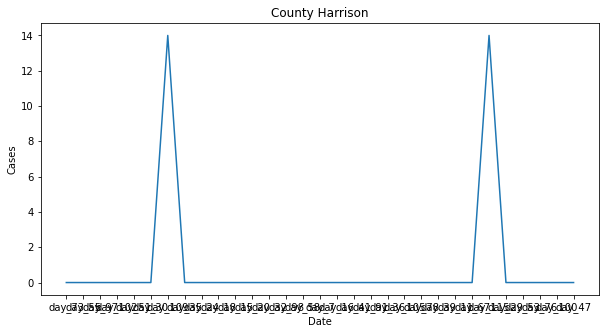

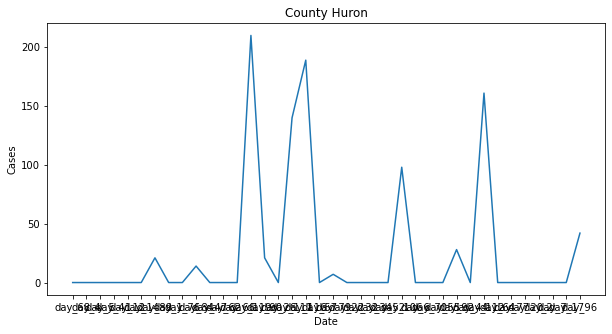

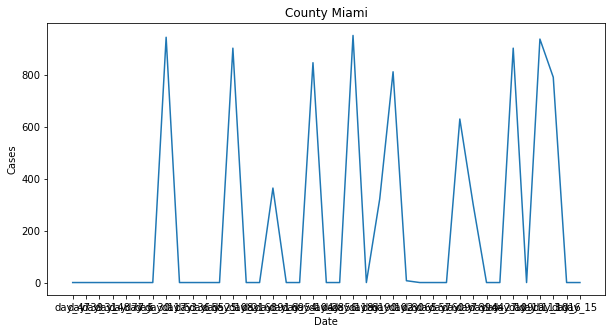

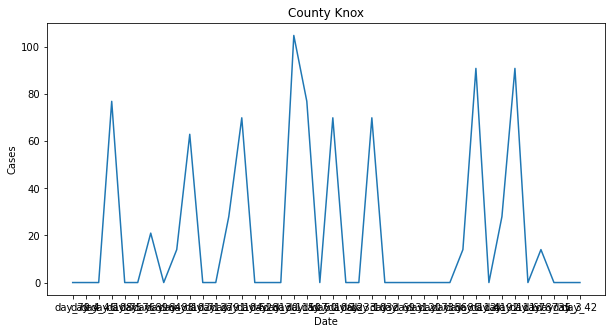

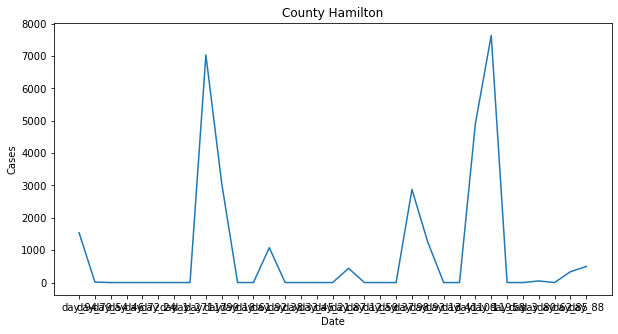

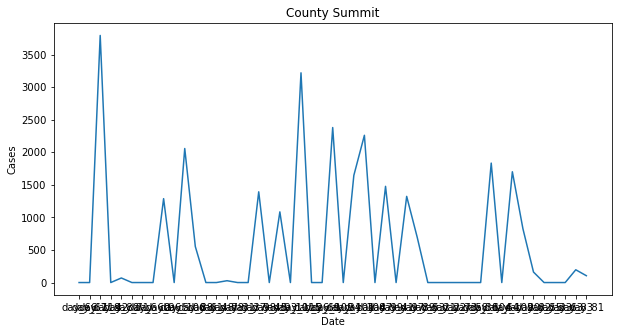

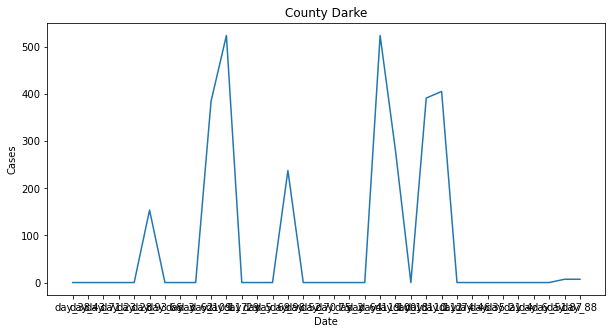

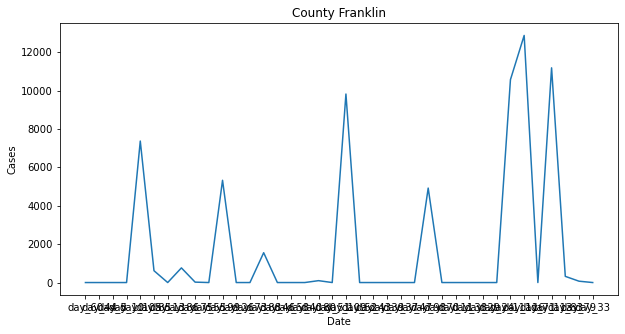

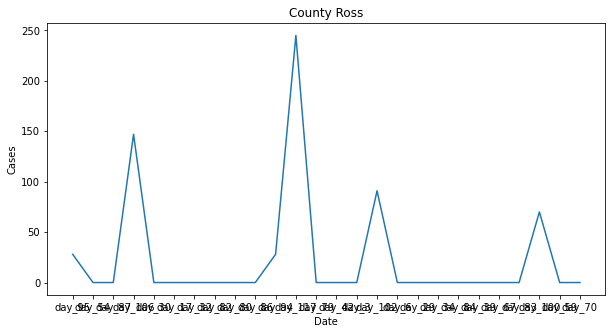

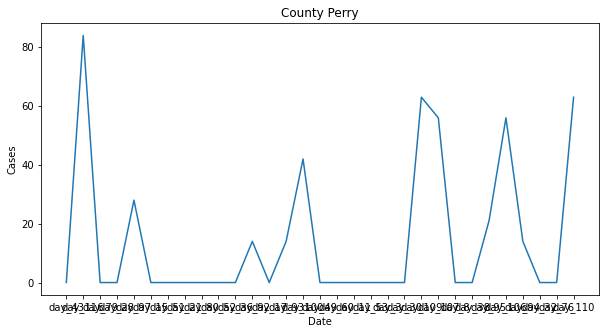

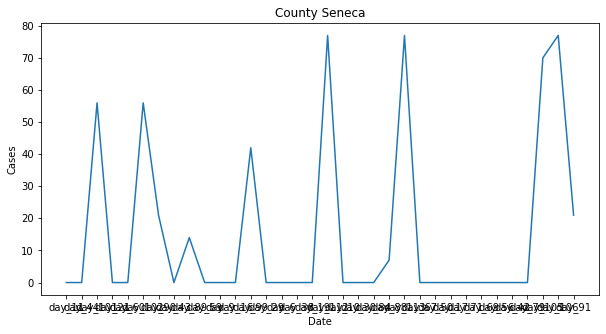

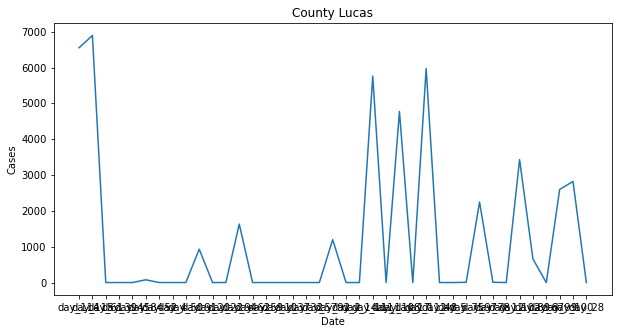

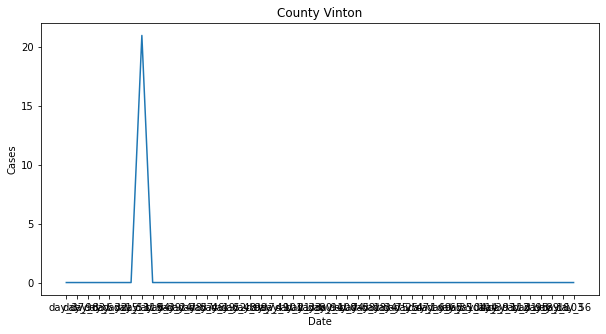

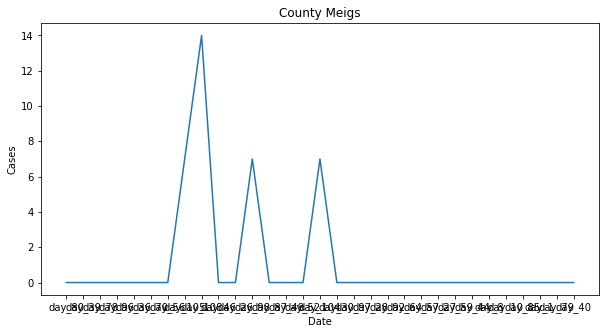

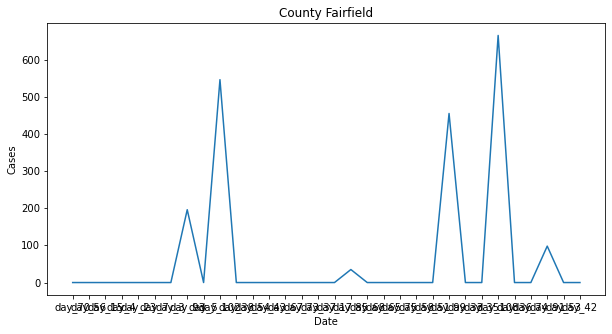

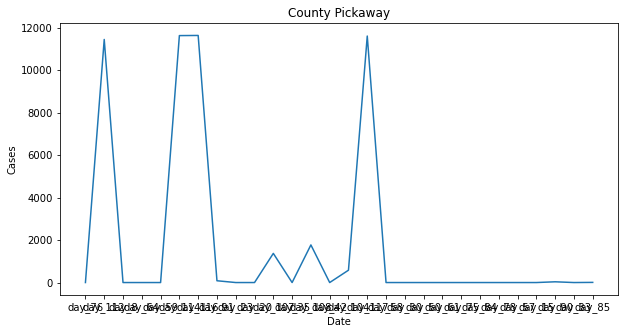

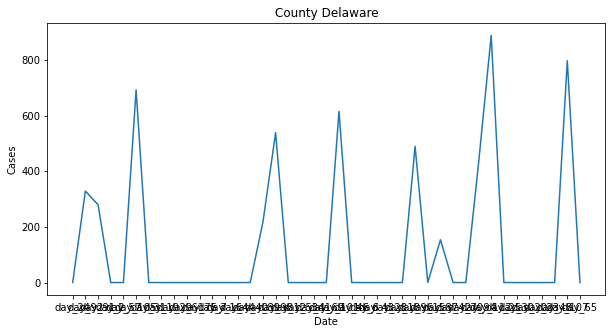

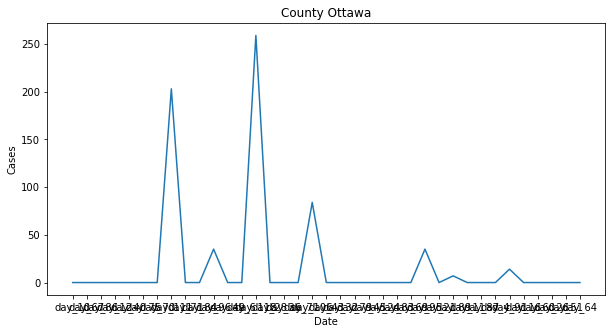

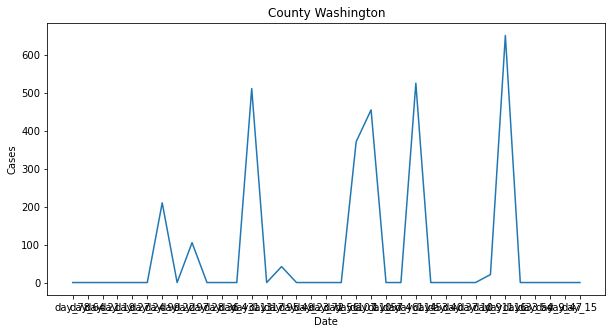

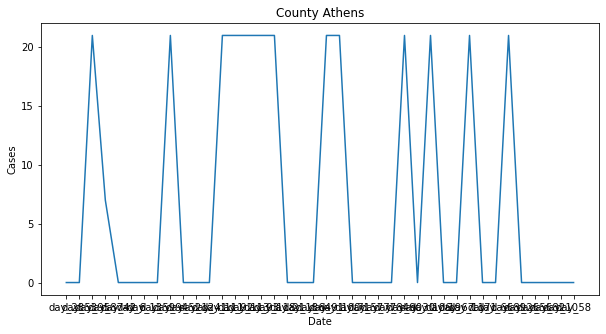

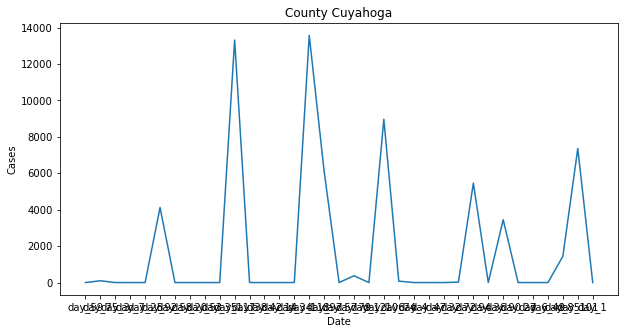

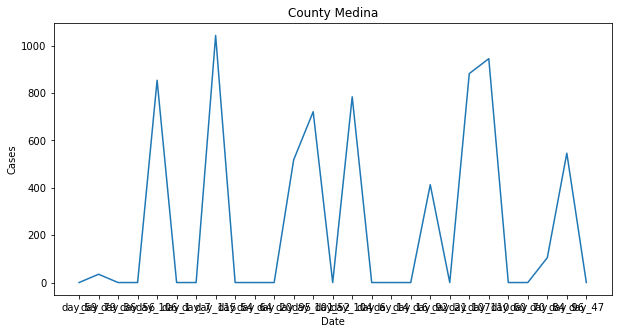

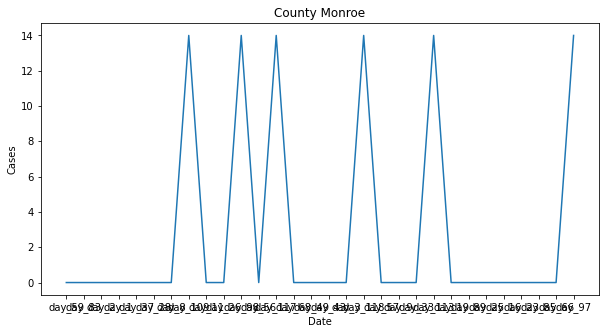

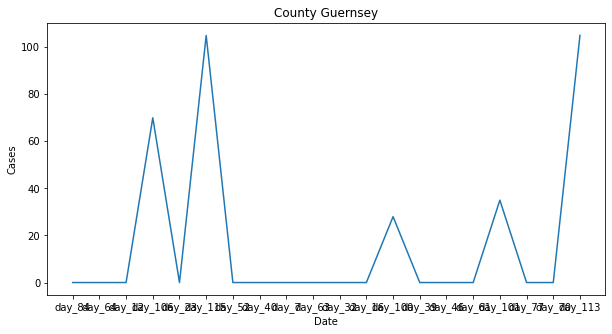

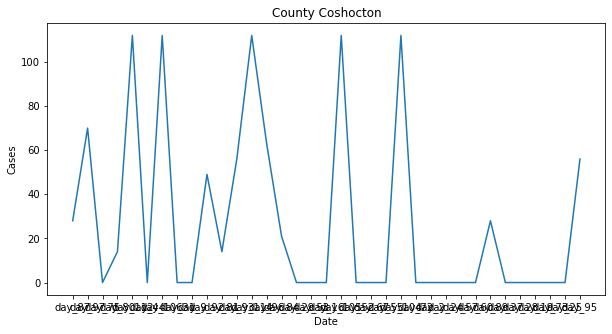

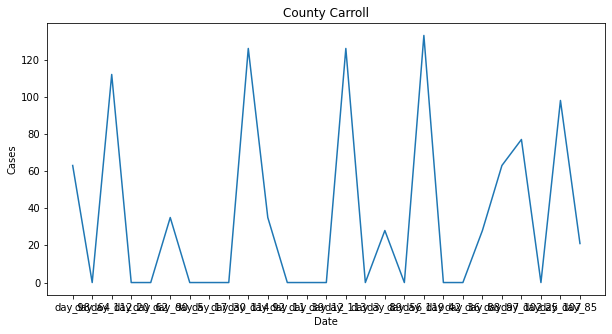

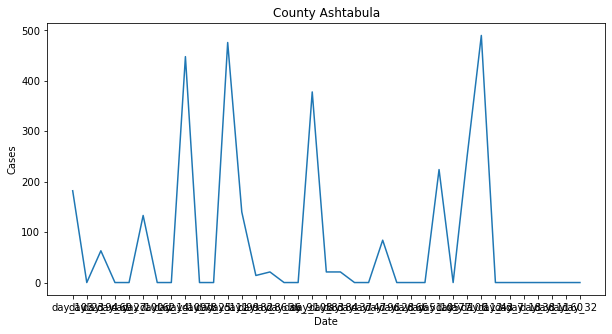

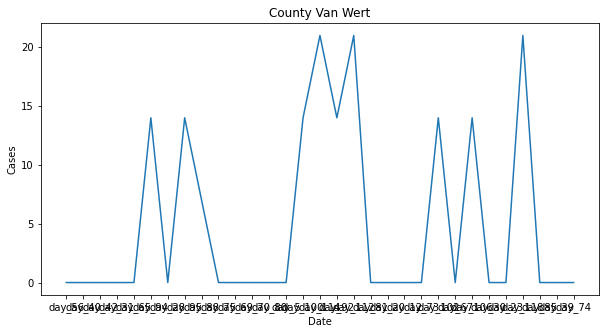

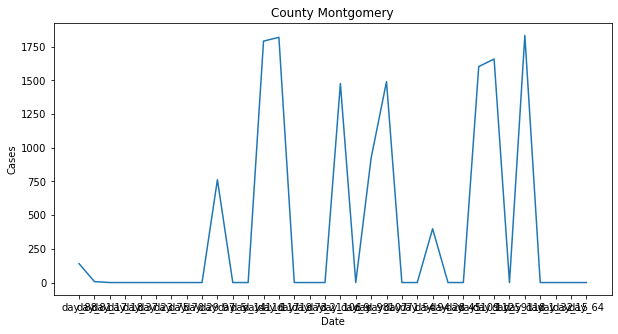

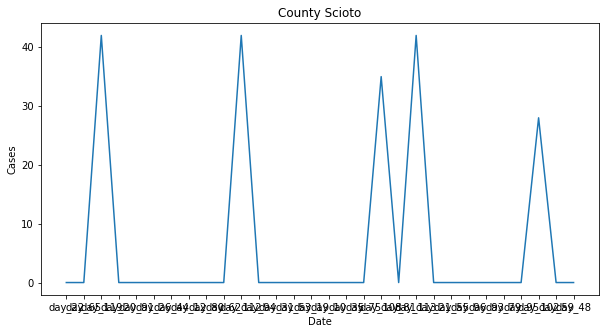

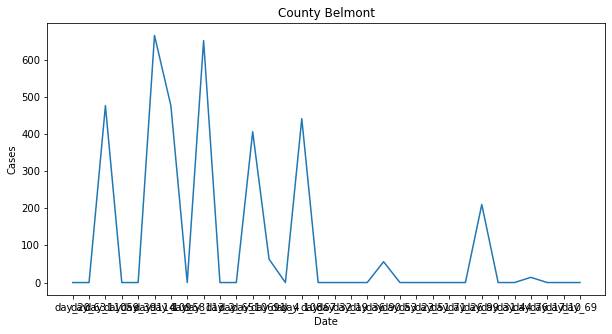

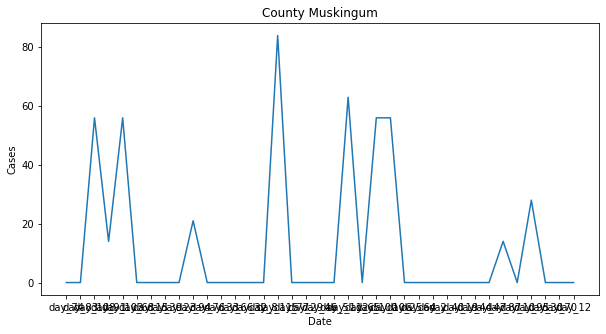

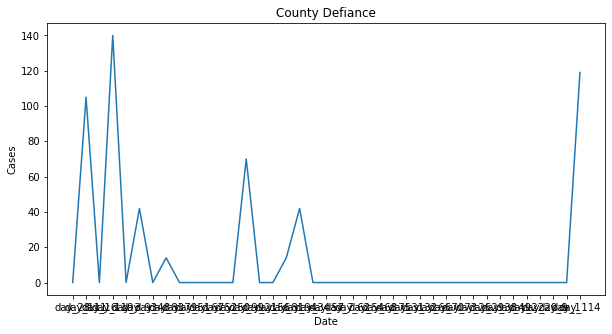

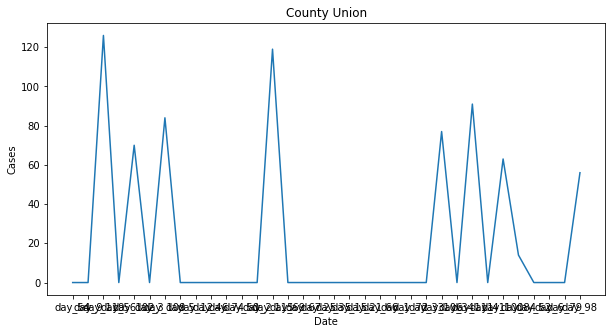

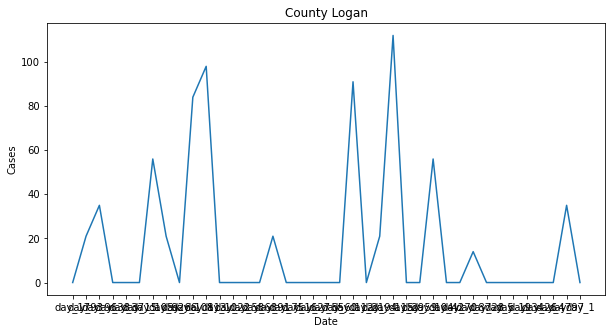

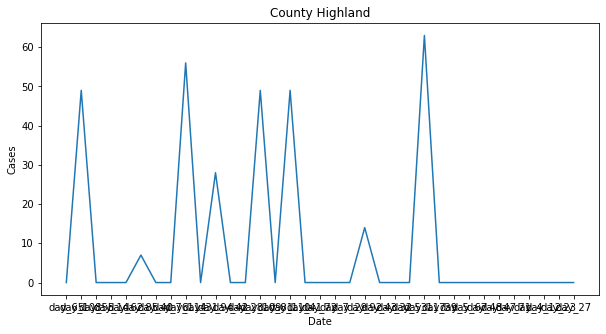

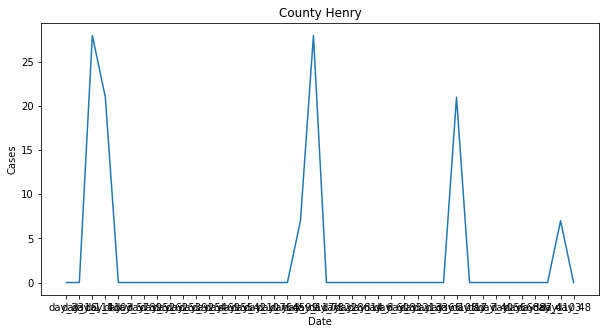

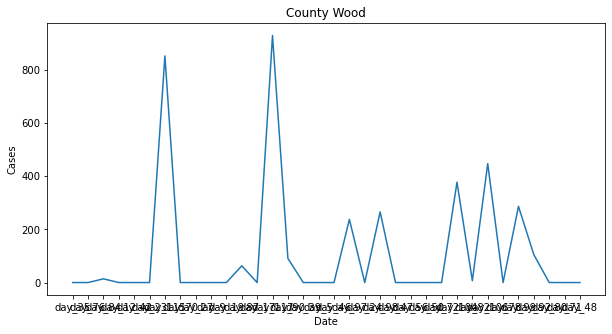

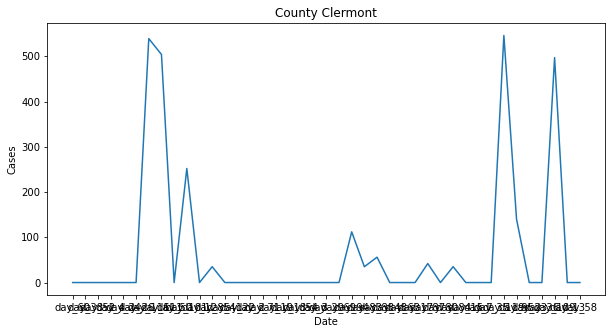

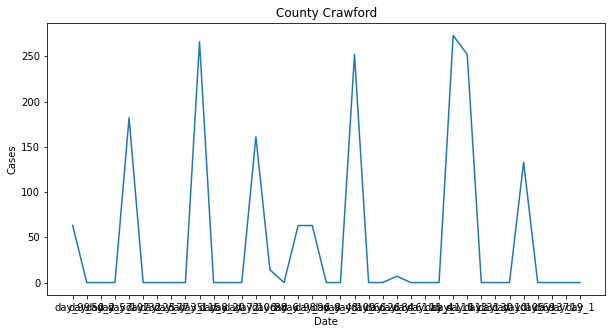

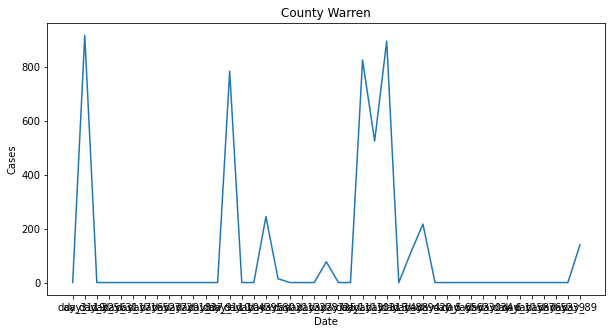

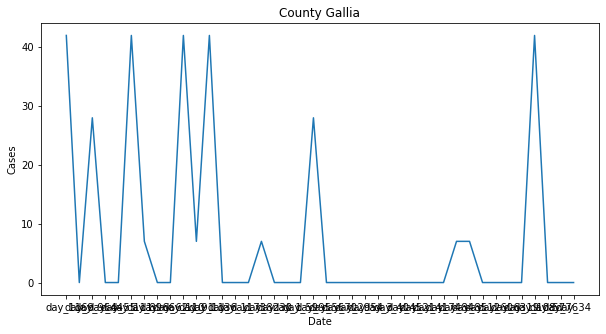

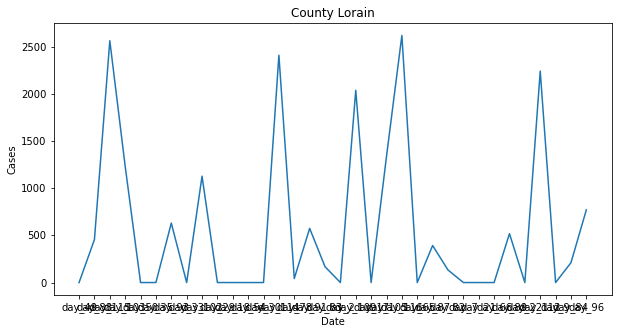

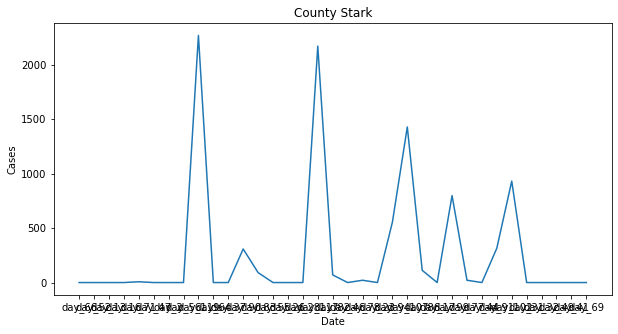

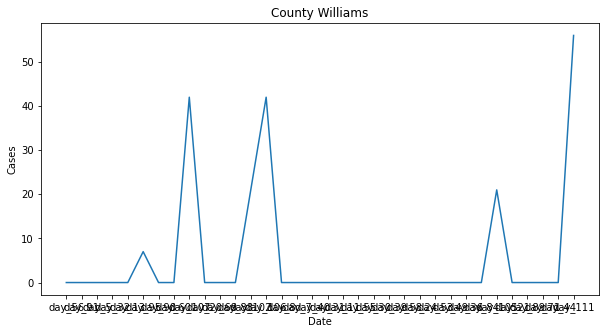

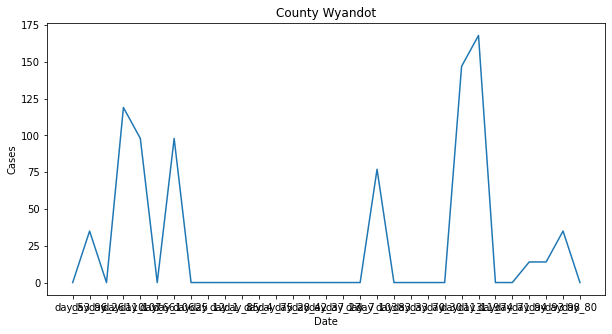

In [6]:
#create a time series plot for each county
for i in train['county'].unique():
    plt.figure(figsize=(10, 5))
    plt.plot(train[train['county'] == i]['date_index_converted'], train[train['county'] == i]['cases'])
    plt.title('County {}'.format(i))
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.show()

    

In [7]:
#create a model for each county
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

for i in train['county'].unique():
    X = train[train['county'] == i]['date_index_converted'].values.reshape(-1, 1)
    y = train[train['county'] == i]['cases'].values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('County {}:'.format(i))
    print('Mean Squared Error: {}'.format(mean_squared_error(y_test, y_pred)))
    print('R^2: {}'.format(model.score(X_test, y_test)))
    print('')
    

ValueError: could not convert string to float: 'day_27'